# PCA from scratch

По этой статье: https://habr.com/ru/articles/304214/

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
x = np.arange(1,11)
y = 2 * x + np.random.randn(10)*2
X = np.vstack((x,y))

In [ ]:
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
y

array([-1.2258313 ,  0.02561864,  1.64931359,  8.88128723,  7.99963642,
       11.42761235, 15.84564653, 12.343184  , 16.62570489, 20.69980184])

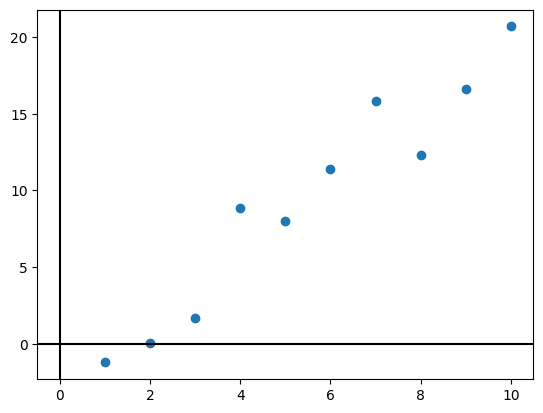

In [ ]:
plt.scatter(x, y)
plt.axhline(y=0.0, color='black')
plt.axvline(x=0.0, color='black')

В данной выборке у нас имеются два признака, сильно коррелирующие друг с другом. С помощью алгоритма PCA мы сможем легко найти признак-комбинацию и, ценой части информации, выразить оба этих признака одним новым.

Отцентрируем нашу выборку: линейно сдвинем ее так, чтобы средние значения признаков были равны 0

In [ ]:
Xcentered = (X[0] - x.mean(), X[1] - y.mean())

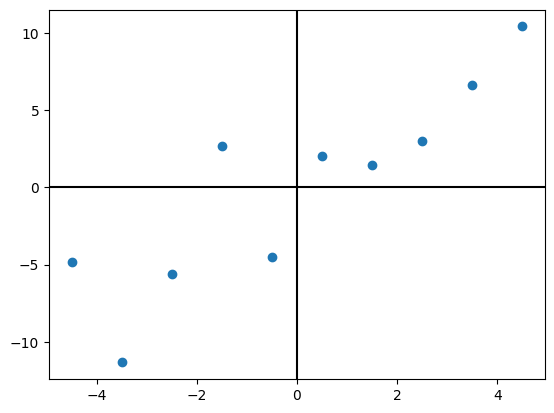

In [ ]:
plt.scatter(Xcentered[0], Xcentered[1])
plt.axhline(y=0.0, color='black')
plt.axvline(x=0.0, color='black')

Построим ковариационную матрицу -т.е. матрицу корреляций между признаками:

In [ ]:
covmat = np.cov(Xcentered)

В матрице по диагонали будут дисперсии признаков, а в остальных ячейках – ковариации соответствующих пар признаков:


In [ ]:
covmat

array([[ 9.16666667, 17.15154241],
       [17.15154241, 42.11845799]])

In [ ]:
print("Variance of X: ", np.cov(Xcentered)[0,0])
print("Variance of Y: ", np.cov(Xcentered)[1,1])
print("Covariance X and Y: ", np.cov(Xcentered)[0,1])

Variance of X:  9.166666666666666
Variance of Y:  42.11845799465856
Covariance X and Y:  17.15154240826167


Найдем собственные вектора и значения:

In [ ]:
eigenvals, eigenvecs = np.linalg.eig(covmat)

In [ ]:
eigenvals

array([ 1.85957377, 49.42555089])

In [ ]:
eigenvecs

array([[-0.91998904, -0.39194407],
       [ 0.39194407, -0.91998904]])

Отсортируем собственные значения по убыванию:

In [ ]:
sorted_index = np.argsort(eigenvals)[::-1]
sorted_eigenvalues = eigenvals[sorted_index]
sorted_eigenvectors = eigenvecs[:,sorted_index]

In [ ]:
sorted_eigenvectors

array([[-0.39194407, -0.91998904],
       [-0.91998904,  0.39194407]])

Посмотрим, сколько дисперсии объясняет каждое значение:

In [ ]:
eig_vals_total = sum(sorted_eigenvalues)
explained_variance = [(i / eig_vals_total)*100 for i in sorted_eigenvalues]
explained_variance = np.round(explained_variance, 2)
cum_explained_variance = np.cumsum(explained_variance)

In [ ]:
print('Explained variance: {}'.format(explained_variance))
print('Cumulative explained variance: {}'.format(cum_explained_variance))

Explained variance: [96.37  3.63]
Cumulative explained variance: [ 96.37 100.  ]


Снизим размерность до 1:

In [ ]:
n_components = 1
W = sorted_eigenvectors[:n_components, :] # Projection matrix

print(W.shape)

(1, 2)


In [ ]:
W

array([[-0.39194407, -0.91998904]])

Трансформируем данные:

In [ ]:
X_reduced = np.dot(W, np.array(Xcentered))

In [ ]:
X_reduced

array([[  6.19454582,  11.80926851,   6.12987205,  -1.91608644,
          4.35008019,  -2.08483895,  -1.93097242,  -3.72396128,
         -7.4593853 , -11.36852218]])

Сравним с PCA из sklearn:

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 1)
XPCAreduced = pca.fit_transform(X.transpose())

In [ ]:
XPCAreduced

array([[  6.19454582],
       [ 11.80926851],
       [  6.12987205],
       [ -1.91608644],
       [  4.35008019],
       [ -2.08483895],
       [ -1.93097242],
       [ -3.72396128],
       [ -7.4593853 ],
       [-11.36852218]])

In [ ]:
print('Projection: ', pca.components_, W)
print('Explained variance ratio: ', pca.explained_variance_ratio_, explained_variance)

Projection:  [[-0.39194407 -0.91998904]] [[-0.39194407 -0.91998904]]
Explained variance ratio:  [0.96374048] [96.37  3.63]
